<a href="https://colab.research.google.com/github/MrOldFox/BotNest/blob/master/ML%20(titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 промежуточная аттестация

Модель даных: Titanic

*Заранее предупредил ответственных за обучение, что в период аттестации буду находиться в отпуске. Поэтому небольшие задержки по срокам исполнения аттестации и домашнего задания.*

1. Загрузка и предобработка данных

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Загрузка данных
data = sns.load_dataset('titanic')

# Удаление ненужных столбцов
data = data.drop(columns=['deck', 'embark_town', 'alive', 'who'])

# Заполнение пропущенных значений для числовых столбцов
numeric_features = ['age', 'fare']
numeric_imputer = SimpleImputer(strategy='most_frequent')
data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

# Заполнение пропущенных значений для категориальных столбцов
categorical_features = ['embarked']
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

# Кодирование категориальных признаков
data = pd.get_dummies(data, columns=['sex', 'embarked', 'class'], drop_first=True)

# Масштабирование числовых признаков
scaler = StandardScaler()
data[['age', 'fare']] = scaler.fit_transform(data[['age', 'fare']])

# Отделение признаков от целевой переменной
X = data.drop(columns=['survived'])
y = data['survived']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Анализ данных

         survived      pclass           age       sibsp       parch  \
count  891.000000  891.000000  8.910000e+02  891.000000  891.000000   
mean     0.383838    2.308642  5.980999e-17    0.523008    0.381594   
std      0.486592    0.836071  1.000562e+00    1.102743    0.806057   
min      0.000000    1.000000 -2.133613e+00    0.000000    0.000000   
25%      0.000000    2.000000 -4.977933e-01    0.000000    0.000000   
50%      0.000000    3.000000 -3.461881e-01    0.000000    0.000000   
75%      1.000000    3.000000  4.876403e-01    1.000000    0.000000   
max      1.000000    3.000000  3.898757e+00    8.000000    6.000000   

               fare  
count  8.910000e+02  
mean   3.987333e-18  
std    1.000562e+00  
min   -6.484217e-01  
25%   -4.891482e-01  
50%   -3.573909e-01  
75%   -2.424635e-02  
max    9.667167e+00  


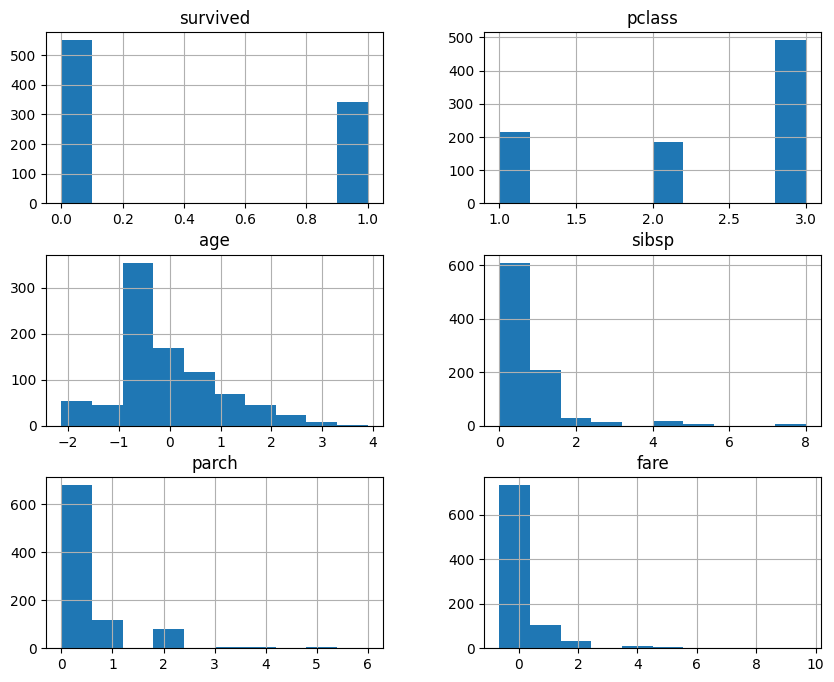

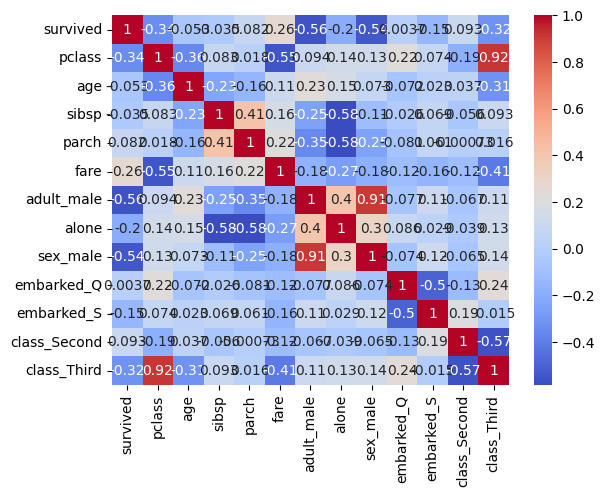

In [ ]:
# Первичный анализ данных
print(data.describe())

# Распределение признаков
data.hist(figsize=(10, 8))
plt.show()

# Корреляционный анализ
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


3. Построение модели логистической регрессии

Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901
ROC AUC: 0.8808236808236808


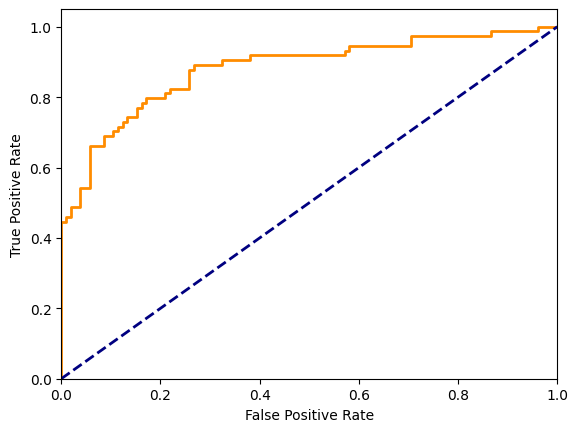

In [ ]:
# Создание и обучение модели логистической регрессии
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Предсказания
y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Оценка качества модели логистической регрессии
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_proba_logistic)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logistic)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

4. Построение модели дерева решений

In [ ]:
# Создание и обучение модели дерева решений
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Предсказания
y_pred_tree = tree_model.predict(X_test)
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Оценка качества модели дерева решений
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, y_proba_tree)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.7877094972067039
Precision: 0.7307692307692307
Recall: 0.7702702702702703
F1 Score: 0.75
ROC AUC: 0.7974259974259974


5. Построение модели случайного леса

In [ ]:
# Создание и обучение модели случайного леса
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Предсказания
y_pred_forest = forest_model.predict(X_test)
y_proba_forest = forest_model.predict_proba(X_test)[:, 1]

# Оценка качества модели случайного леса
accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)
roc_auc = roc_auc_score(y_test, y_proba_forest)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.8268156424581006
Precision: 0.8028169014084507
Recall: 0.7702702702702703
F1 Score: 0.7862068965517242
ROC AUC: 0.8937580437580437


6. Сравнение моделей

                     Model  Accuracy  Precision   Recall  F1 Score   ROC AUC
0  Логистическая регрессия  0.810056   0.794118  0.72973  0.760563  0.880824
1           Дерево решений  0.787709   0.730769  0.77027  0.750000  0.797426
2            Случайный лес  0.826816   0.802817  0.77027  0.786207  0.893758


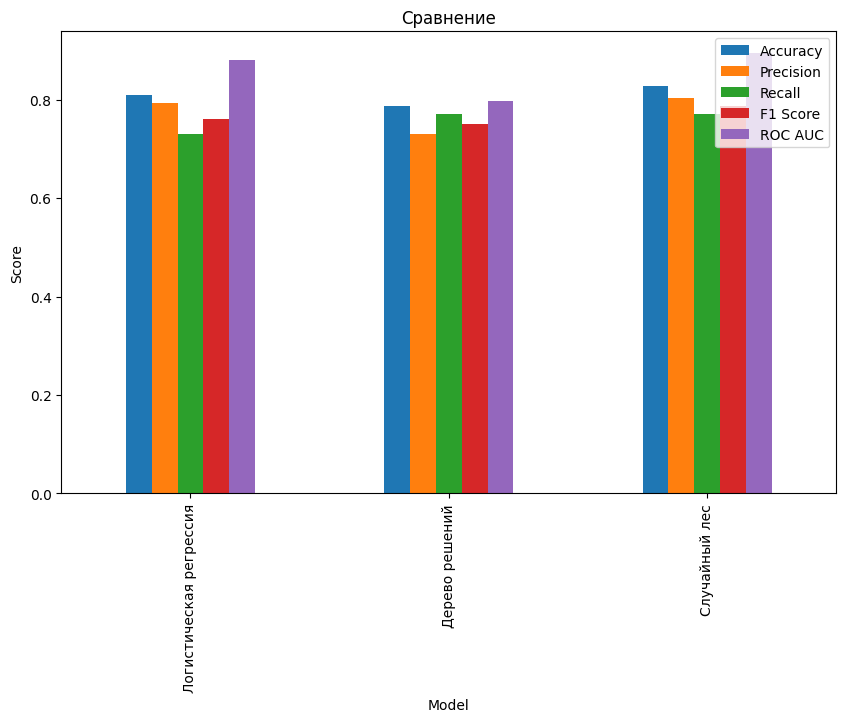

In [ ]:
# Сравнение моделей по метрикам
models_results = pd.DataFrame({
    'Model': ['Логистическая регрессия', 'Дерево решений', 'Случайный лес'],
    'Accuracy': [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_forest)],
    'Precision': [precision_score(y_test, y_pred_logistic), precision_score(y_test, y_pred_tree), precision_score(y_test, y_pred_forest)],
    'Recall': [recall_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_tree), recall_score(y_test, y_pred_forest)],
    'F1 Score': [f1_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_tree), f1_score(y_test, y_pred_forest)],
    'ROC AUC': [roc_auc_score(y_test, y_proba_logistic), roc_auc_score(y_test, y_proba_tree), roc_auc_score(y_test, y_proba_forest)]
})

print(models_results)

# Визуализация результатов
models_results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()


## Обсуждение:

**Логистическая регрессия:**

Плюсы: Легко понять, как она работает. Она хорошо объясняет, почему делает такие предсказания, и может дать вероятности для каждого предсказания.

Минусы: Работает хорошо только с данными, которые можно разделить прямой линией. Если данные сложные и нелинейные, модель может показывать плохие результаты.

**Дерево решений:**

Плюсы: Похоже на процесс принятия решений человеком. Можно легко увидеть, как модель принимает решения. Хорошо работает с данными, которые нельзя просто разделить прямой линией. Не требует масштабирования признаков и хорошо работает с пропущенными значениями.

Минусы: Может запомнить слишком много деталей тренировочных данных, из-за чего будет плохо работать на новых данных (переобучение). Также маленькие изменения в данных могут привести к сильным изменениям в структуре дерева.

**Случайный лес:**

Плюсы: Объединяет много деревьев решений, чтобы сделать более точные предсказания и избежать переобучения. Меньше склонен к переобучению по сравнению с одним деревом решений. Хорошо работает с пропущенными данными и различными типами признаков.

Минусы: Труднее понять, как именно модель делает предсказания, потому что она использует много деревьев. Также требует больше вычислительных ресурсов и времени на обучение.

# Итоги

Логистическая регрессия: Хорошо подходит для начального анализа данных. Она дает понимание, как разные признаки влияют на конечный реультат, и покажет вероятности выживания для каждого пассажира.

Дерево решений: Подходит, если нужно понять взаимодействия между признаками и видеть чёткие правила. Но есть риск, что модель запомнит слишком много деталей из тренировочных данных.

Случайный лес: НАверное будет самой точной моделью для данных Titanic. Он хорошо справляется с сложными зависимостями и уменьшает риск переобучения. Но понять результаты будет сложнее.

---


**В итоге, каждая модель имеет свои сильные и слабые стороны. Выбор модели зависит от данных и задач.**

## Домашнее задание

Установка и импорт библиотек для градиентного бустинга

In [ ]:
# Установка библиотеки XGBoost
!pip install xgboost

import xgboost as xgb

Обучение модели XGBoost

In [ ]:
# Создание и обучение модели XGBoost
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, random_state=42)
xgboost_model.fit(X_train, y_train)

# Предсказания
y_pred_xgboost = xgboost_model.predict(X_test)
y_proba_xgboost = xgboost_model.predict_proba(X_test)[:, 1]

Оценка качества модели XGBoost

In [ ]:
# Оценка качества модели XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost)
roc_auc_xgboost = roc_auc_score(y_test, y_proba_xgboost)

print(f'Accuracy: {accuracy_xgboost}')
print(f'Precision: {precision_xgboost}')
print(f'Recall: {recall_xgboost}')
print(f'F1 Score: {f1_xgboost}')
print(f'ROC AUC: {roc_auc_xgboost}')

Accuracy: 0.8156424581005587
Precision: 0.8059701492537313
Recall: 0.7297297297297297
F1 Score: 0.7659574468085106
ROC AUC: 0.8866151866151866


Сравнение всех моделей

                     Model  Accuracy  Precision   Recall  F1 Score   ROC AUC
0  Логистическая регрессия  0.810056   0.794118  0.72973  0.760563  0.880824
1           Дерево решений  0.787709   0.730769  0.77027  0.750000  0.797426
2            Случайный лес  0.826816   0.802817  0.77027  0.786207  0.893758
3                  XGBoost  0.815642   0.805970  0.72973  0.765957  0.886615


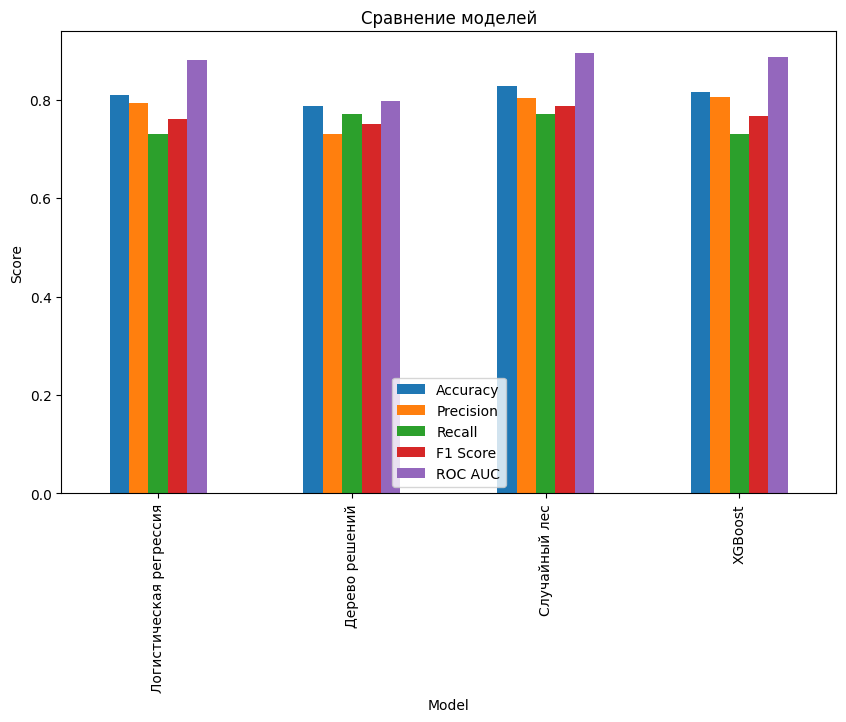

In [ ]:
# Сравнение моделей по метрикам, включая XGBoost
models_results = pd.DataFrame({
    'Model': ['Логистическая регрессия', 'Дерево решений', 'Случайный лес', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_forest), accuracy_xgboost],
    'Precision': [precision_score(y_test, y_pred_logistic), precision_score(y_test, y_pred_tree), precision_score(y_test, y_pred_forest), precision_xgboost],
    'Recall': [recall_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_tree), recall_score(y_test, y_pred_forest), recall_xgboost],
    'F1 Score': [f1_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_tree), f1_score(y_test, y_pred_forest), f1_xgboost],
    'ROC AUC': [roc_auc_score(y_test, y_proba_logistic), roc_auc_score(y_test, y_proba_tree), roc_auc_score(y_test, y_proba_forest), roc_auc_xgboost]
})

print(models_results)

# Визуализация результатов
models_results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение моделей')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()